In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
og_data = pd.read_table('/Users/suhancho/Downloads/og_dat.txt' , encoding='cp949', sep='\t',index_col=0).T
mod_data = pd.read_table('/Users/suhancho/Downloads/mod_dat.txt' , encoding='cp949', sep='\t',index_col=0).T
og_data = og_data.iloc[:,0:1].reset_index()
mod_data = mod_data.iloc[:,0:1].reset_index()

og_data.columns = ['Date','Value']
mod_data.columns = ['Date','Value']

# 2

Text(0.5, 1.0, 'OG and MOD values')

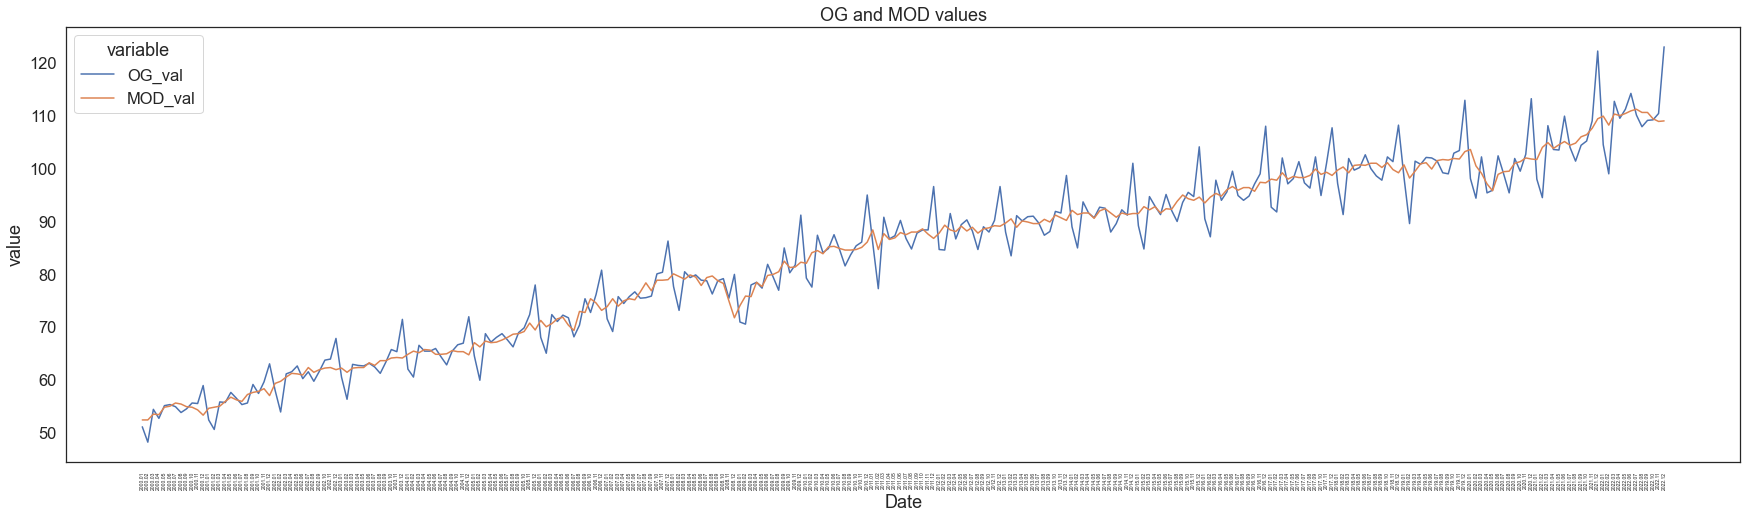

In [63]:
merged = pd.concat([og_data,mod_data],axis=1)
merged.columns = ['Date','OG_val','Date2','MOD_val']
merged = merged[['Date','OG_val','MOD_val']]
merged = merged.melt(id_vars = 'Date')
plt.figure(figsize = (30,8))
sns.set(font_scale = 1.5,style = 'white')
ax = sns.lineplot(data = merged,x = 'Date',y = 'value',hue = 'variable')
plt.xticks(rotation = 90,size = 5)
plt.title('OG and MOD values')


# 3

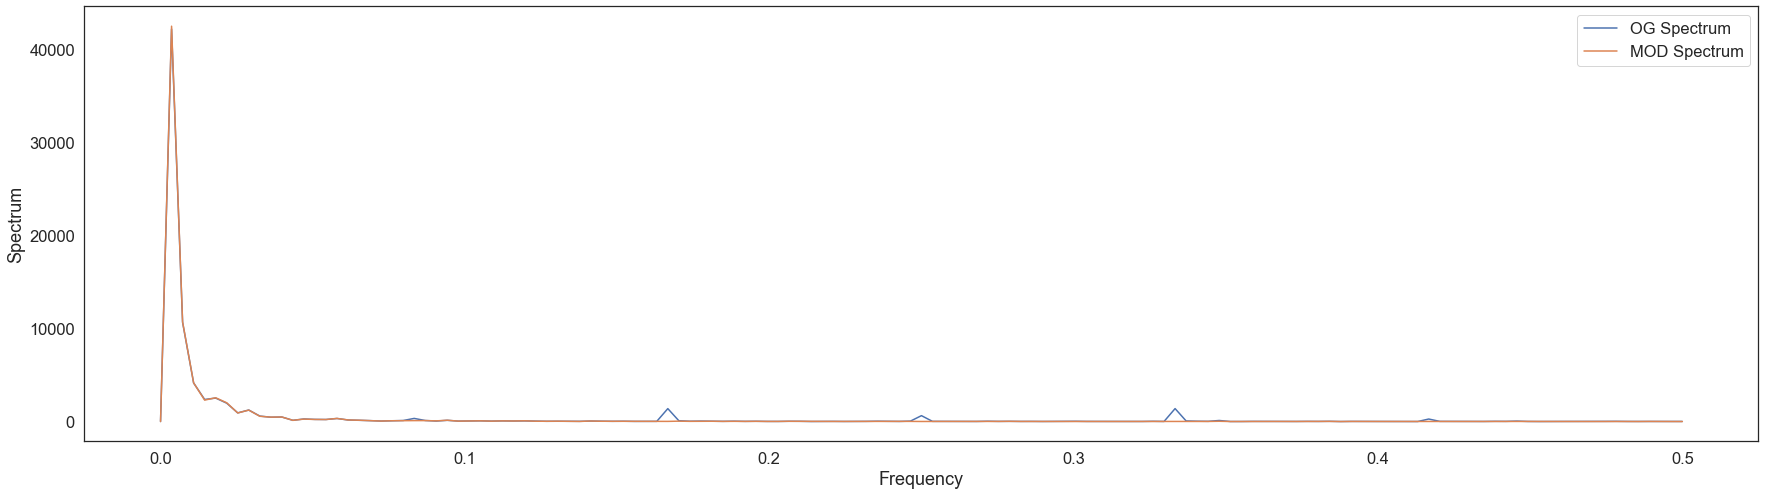

In [68]:
from scipy.signal import periodogram
og_data = pd.read_table('/Users/suhancho/Downloads/og_dat.txt' , encoding='cp949', sep='\t',index_col=0).T
mod_data = pd.read_table('/Users/suhancho/Downloads/mod_dat.txt' , encoding='cp949', sep='\t',index_col=0).T
og_data = og_data.iloc[:,0:1].reset_index()
mod_data = mod_data.iloc[:,0:1].reset_index()

og_data.columns = ['Date','Value']
mod_data.columns = ['Date','Value']

df2 = mod_data
df2.set_index("Date", inplace=True)

df1 = og_data
df1.set_index("Date", inplace=True)

# 원계열에 대한 스펙트럼
freq, original_spectrum = periodogram(df1['Value'])

# 계절조정계열 생성
# 계절조정계열에 대한 스펙트럼
freq, adjusted_spectrum = periodogram(df2['Value'])

# 그래프 그리기
plt.figure(figsize=(30, 8))
sns.set(font_scale = 1.5,style = 'white')
plt.plot(freq, original_spectrum, label="OG Spectrum")
plt.plot(freq, adjusted_spectrum, label="MOD Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Spectrum")
plt.legend()
plt.show()


# 4-1

In [73]:
og_data = pd.read_table('/Users/suhancho/Downloads/og_dat.txt' , encoding='cp949', sep='\t',index_col=0).T
mod_data = pd.read_table('/Users/suhancho/Downloads/mod_dat.txt' , encoding='cp949', sep='\t',index_col=0).T
og_data = og_data.iloc[:,0:1].reset_index()
mod_data = mod_data.iloc[:,0:1].reset_index()

og_data.columns = ['Date','Value']
mod_data.columns = ['Date','Value']

df = mod_data
df.set_index("Date", inplace=True)


log_df = np.log(df)

# 로그 차분
log_diff_df = log_df.diff().dropna()

# ADF 검정
adf_result_original = adfuller(log_df["Value"])
adf_result_diff = adfuller(log_diff_df["Value"])

print("ADF 검정 결과 (로그 변환 계열):")
print(f"검정 통계량: {adf_result_original[0]}")
print(f"p-value: {adf_result_original[1]}")
print(f"임계값: {adf_result_original[4]}")
print("\nADF 검정 결과 (로그 차분 계열):")
print(f"검정 통계량: {adf_result_diff[0]}")
print(f"p-value: {adf_result_diff[1]}")
print(f"임계값: {adf_result_diff[4]}")


ADF 검정 결과 (로그 변환 계열):
검정 통계량: -1.7664338737650436
p-value: 0.3972490173319654
임계값: {'1%': -3.4548957220044336, '5%': -2.8723451788613157, '10%': -2.572527778361272}

ADF 검정 결과 (로그 차분 계열):
검정 통계량: -7.035931019010001
p-value: 6.016523685632848e-10
임계값: {'1%': -3.4548957220044336, '5%': -2.8723451788613157, '10%': -2.572527778361272}


# 4-2

/Users/suhancho/miniforge3/envs/keras/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


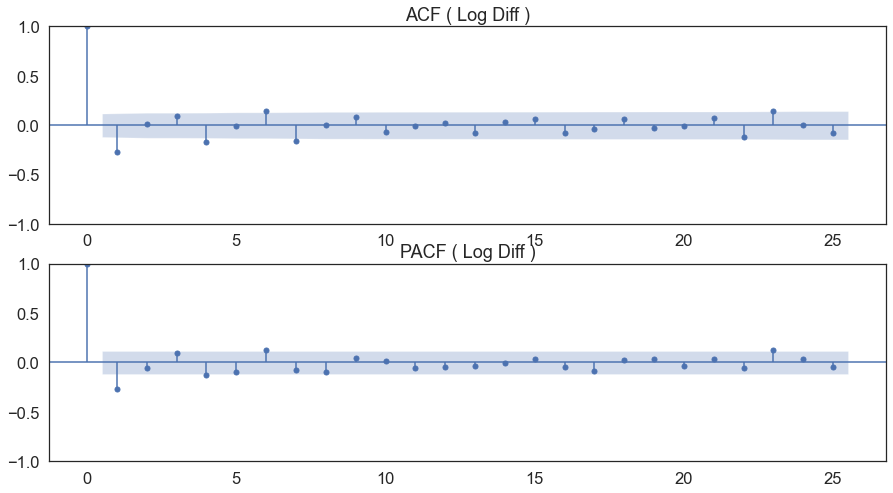

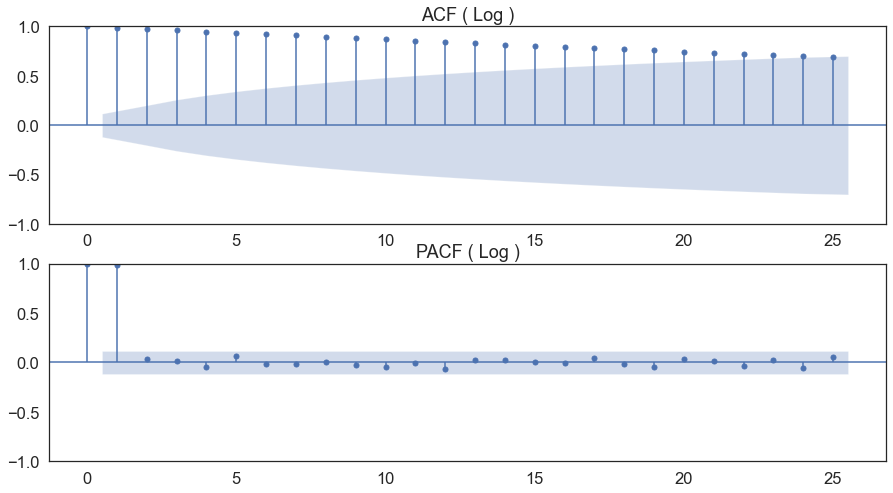

In [74]:

# 상관도표와 부분상관도표
fig, ax = plt.subplots(2, figsize=(15,8))
plot_acf(log_diff_df, ax=ax[0], title="ACF ( Log Diff )")
plot_pacf(log_diff_df, ax=ax[1], title="PACF ( Log Diff )")
plt.show()


fig, ax = plt.subplots(2, figsize=(15,8))
plot_acf(log_df, ax=ax[0], title="ACF ( Log )")
plot_pacf(log_df, ax=ax[1], title="PACF ( Log )")
plt.show()



